/Users/DavianRodriguez/Library/Python/3.9/lib/python/site-packages/mpl_toolkits/mplot3d/art3d.py:902: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/Users/DavianRodriguez/Library/Python/3.9/lib/python/site-packages/mpl_toolkits/mplot3d/art3d.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


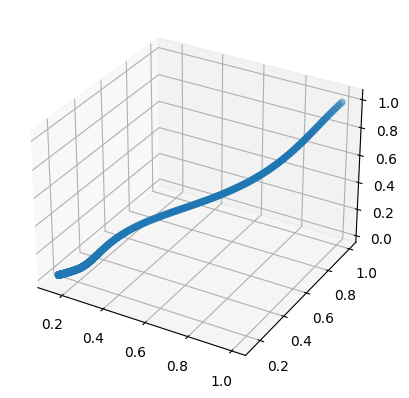

In [2]:
import scipy as sc
import numpy as np

from scipy.integrate import odeint


def lorenz(x,sigma=1,rho=1,beta=1,t=None):
    dxdt = sigma*(x[1]-x[0])
    dydt = x[0]*(rho-x[2])-x[1]
    dzdt = x[0]*x[1] - beta*x[2]
    return np.array([dxdt,dydt,dzdt])


c_0 = np.array([1,1,1])
#set time function for intervals
t = np.linspace(0,20,1000)

def odesolver(lorenz):
    return odeint(lorenz,c_0, t)
#wants it to be one dimensional 


from matplotlib import pyplot as plt
m = odesolver(lorenz)
xval = m[:,0]
yval = m[:,1]
zval = m[:,2]

plt.axes(projection='3d').scatter3D(xval,yval,zval,t)


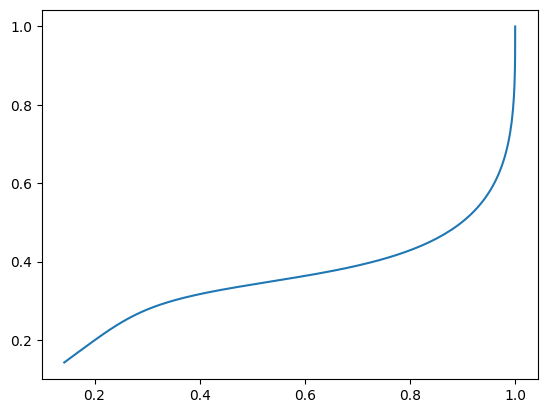

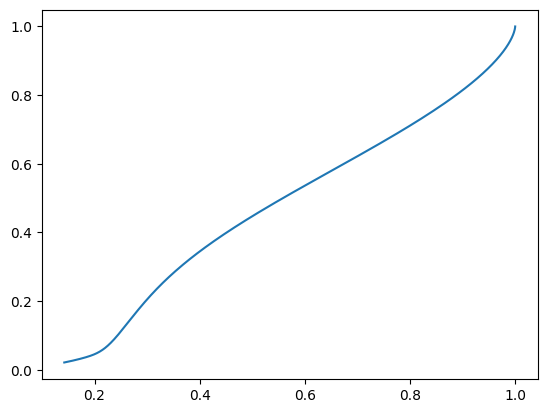

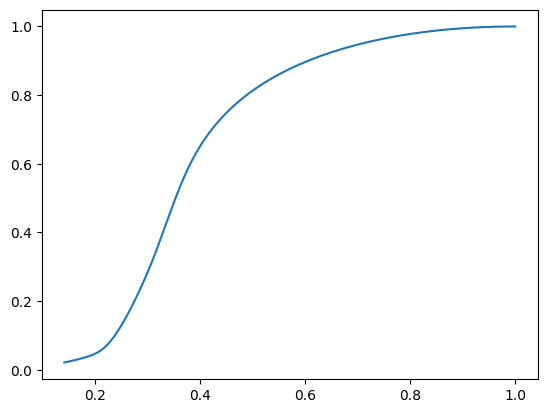

In [3]:
plt.plot(xval,yval)
plt.show()
plt.plot(xval,zval)
plt.show()
plt.plot(yval,zval)
plt.show()

Next is the Lotka-Volterray Equations, better known as the predator-prey equations. This set of differential equations describes the population growth of two linked species. Let describe the population of prey, and y be the population of predators. Then, we get that dx/dt = ax-bxy and dy/dt = cxy-dy, with a,b,c,d as constants. Let us formally define this as a function.

In [30]:

def prey_predator(x,a=10,b=20,c=30,d=40,t=None):
    dxdt = a*x[0]-b*x[0]*x[0]
    dydt = c*x[0]*x[1]-d*x[0]
    return np.array([dxdt,dydt])

Now, we wish to describe an initial condition for this function, as well as discretized time steps.

In [34]:
prpr_initial = np.array((20,20))
time = np.linspace(0,5,2000)

Finally, the function will be inputted into the ODEsolver.

In [37]:
def odesolver2(prey_predator):
    return odeint(prey_predator,prpr_initial,time)

Visualizations of these differential equations are below:

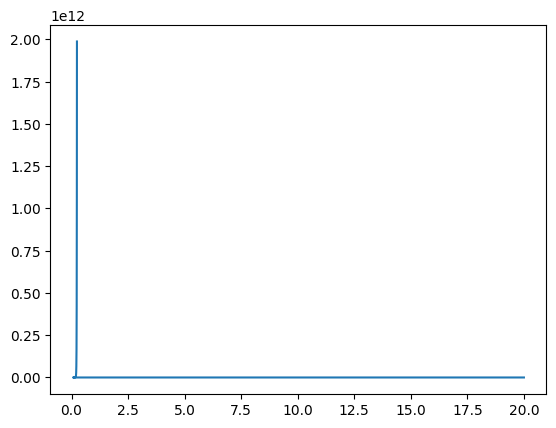

In [39]:
prpr_solution = odesolver2(prey_predator)
xval = prpr_solution[:,0]
yval = prpr_solution[:,1]
plt.plot(xval,yval)

Finally, we will consider the differential equations describing